# Relu

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
from tramp.experiments import run_experiments, qplot, plot_compare

## Model 

GaussBernouilliPrior(size=1000,rho=0.5,mean=0,var=1)
LinearChannel(name=F,Nx=2000,Nz=1000,precompute_svd=True)
ReluChannel()


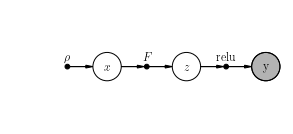

In [3]:
from tramp.models import glm_generative
from tramp.experiments import BayesOptimalScenario

alpha = 2.
N = 1000
teacher = glm_generative(
    N=N, alpha=alpha, ensemble_type="gaussian", prior_type="gauss_bernouilli", 
    output_type="relu", prior_rho=0.5
)
for factor in teacher.factors:
    print(factor)
scenario = BayesOptimalScenario(teacher, x_ids=["x", "z"])
scenario.setup(seed=42)
scenario.student.plot()

## EP time evolution

In [4]:
ep_evo = scenario.ep_convergence(metrics=["mse"], max_iter=10)

INFO:tramp.algos.message_passing:init message dag with ConstantInit(a=0,b=0)
INFO:tramp.algos.message_passing:no damping
INFO:tramp.algos.message_passing:terminated after n_iter=10 iterations


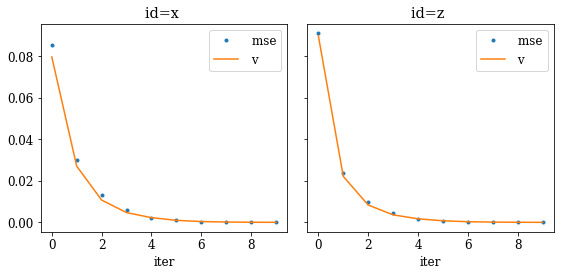

In [5]:
qplot(
    ep_evo, x="iter", y=["mse", "v"],  
    y_markers=[".","-"], column="id", y_legend=True
)

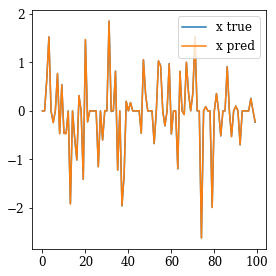

In [6]:
plot_compare(scenario.x_true["x"], scenario.x_pred["x"])

## MSE curve

See `relu_mse_curves.py` for the code

In [7]:
rename = {
    "alpha": r"$\alpha$", "v": "MSE", "n_iter":"iter", "a0": r"$a_0$",
    "prior_rho": r"$\rho$", "x_id=":"", "n_iter":"iterations"
}
mse_curves = pd.read_csv("relu_mse_curves.csv")

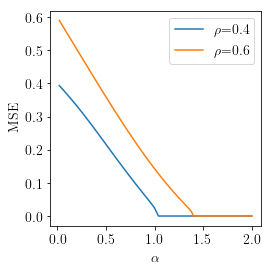

In [8]:
qplot(
    mse_curves.query("x_id =='x'"), x="alpha", y="v", color="prior_rho",
    rename=rename, usetex=True, font_size=14
)

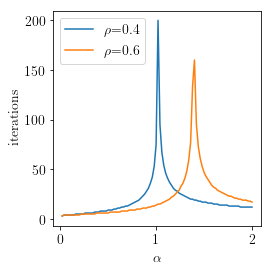

In [9]:
qplot(
    mse_curves.query("x_id =='x'"), x="alpha", y="n_iter", color="prior_rho",
    rename=rename, usetex=True, font_size=14
)

# Critical lines

See `relu_critical_lines.py` for the code.

In [10]:
crit = pd.read_csv("relu_critical_lines.csv")

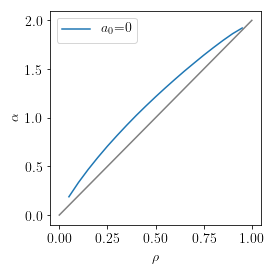

In [11]:
qplot(
    crit, 
    x="prior_rho", y="alpha", color="a0",
    rename=rename, usetex=True, font_size=14
)
plt.plot([0,1], [0,2], color="grey");